# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\DenysK\AppData\Local\Temp\ipykernel_16580\2554403619.py:1: SyntaxWarning: invalid escape sequence '\A'
  img = cv2.imread('D:\AI_learning\images\kodim01.png')


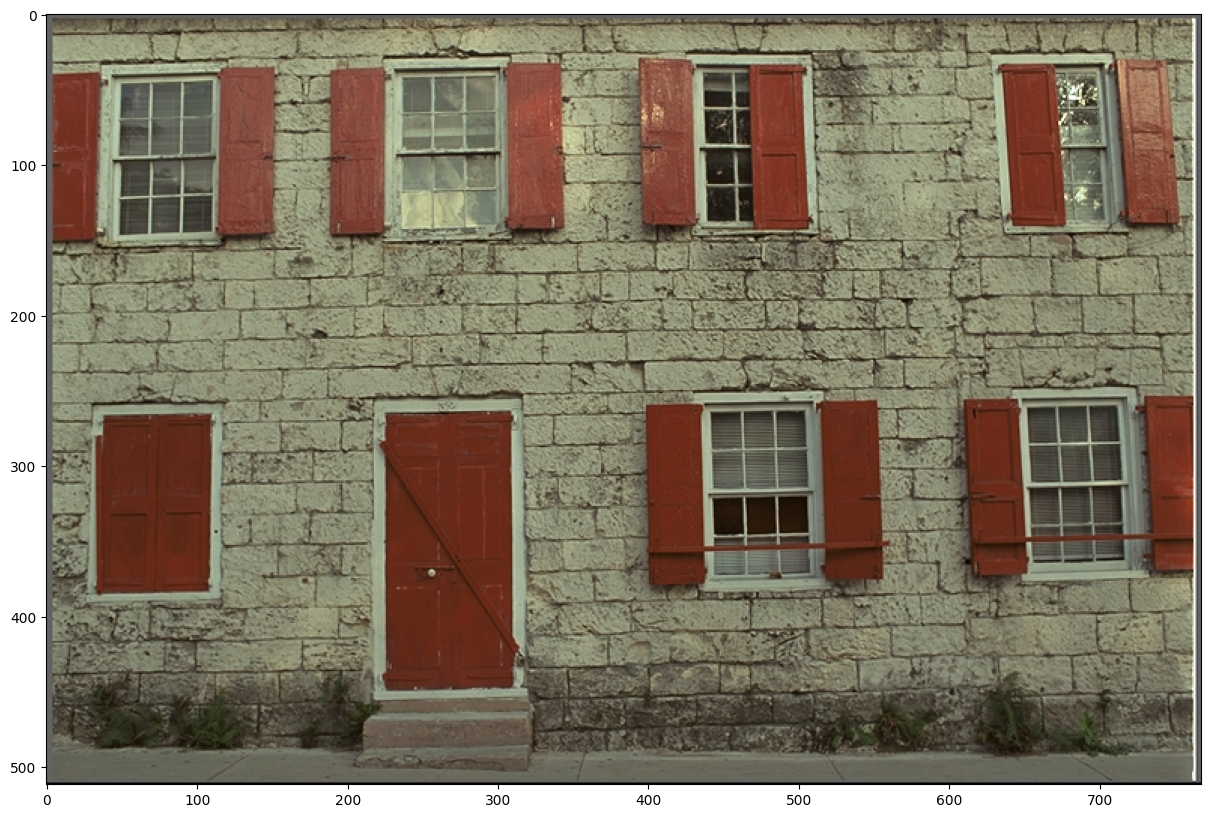

In [3]:
img = cv2.imread('D:\AI_learning\images\kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

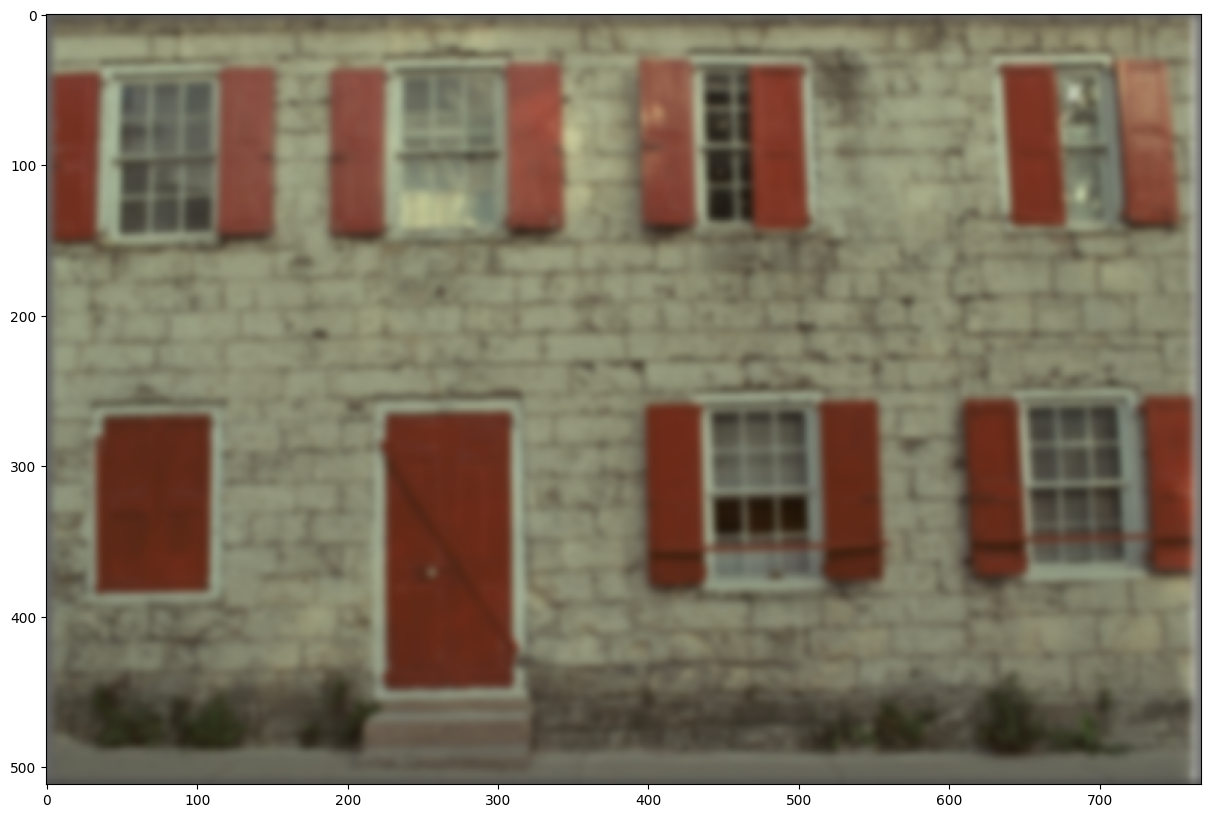

In [6]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (15, 15), 0)
plt.imshow(unsharp)

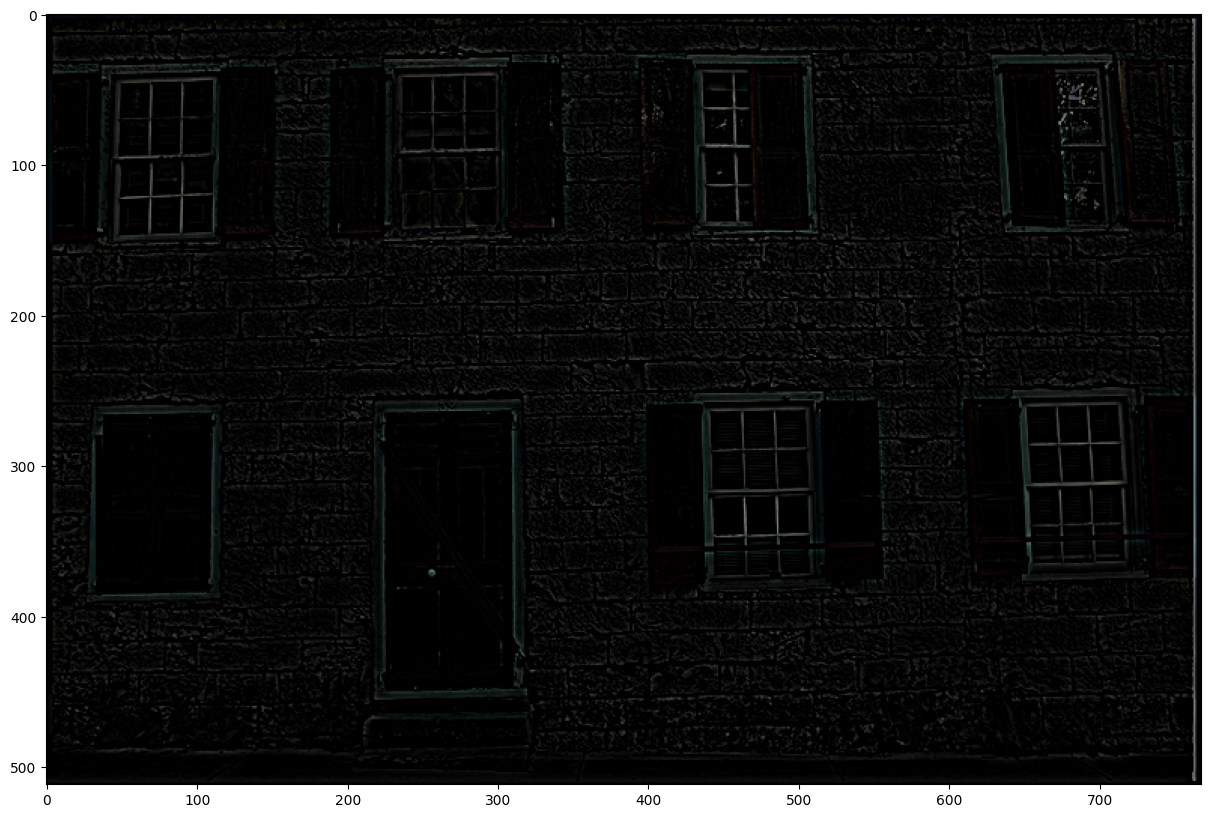

In [7]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
image_float = np.float32(img)
unsharp_float = np.float32(unsharp)

diff = image_float - unsharp_float

diff_uint8 = np.clip(diff, 0, 255).astype('uint8')

out = np.hstack([diff, diff_uint8])

plt.imshow(diff_uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


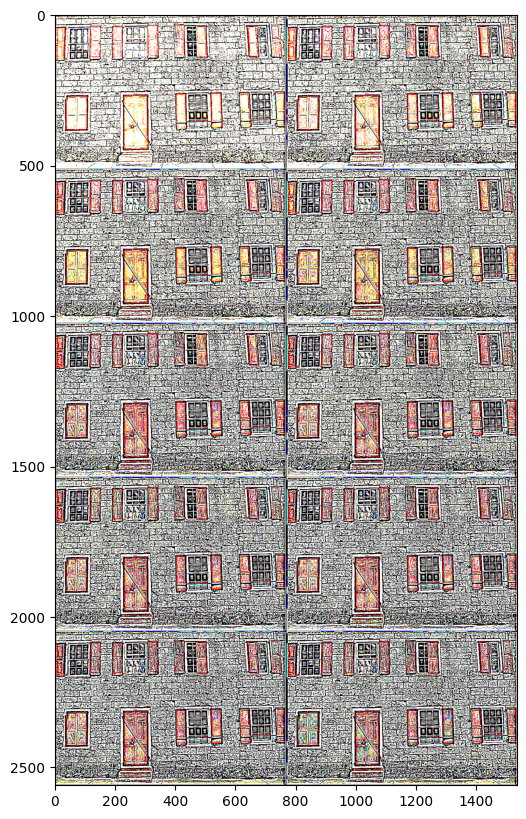

In [8]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened1 = img + ( img - unsharp_float ) * 10
sharpened2 = img + ( img - unsharp_float ) * 20
sharpened3 = img + ( img - unsharp_float ) * 30
sharpened4 = img + ( img - unsharp_float ) * 40
sharpened5 = img + ( img - unsharp_float ) * 50
sharpened6 = img + ( img - unsharp_float ) * 60
sharpened7 = img + ( img - unsharp_float ) * 70
sharpened8 = img + ( img - unsharp_float ) * 80
sharpened9 = img + ( img - unsharp_float ) * 90
sharpened10 = img + ( img - unsharp_float ) * 100

# Create the collage
out1 = np.hstack([sharpened1, sharpened2])
out2 = np.hstack([sharpened3, sharpened4])
out3 = np.hstack([sharpened5, sharpened6])
out4 = np.hstack([sharpened7, sharpened8])
out5 = np.hstack([sharpened9, sharpened10])
out = np.vstack([out1, out2, out3, out4, out5])

plt.imshow(out)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


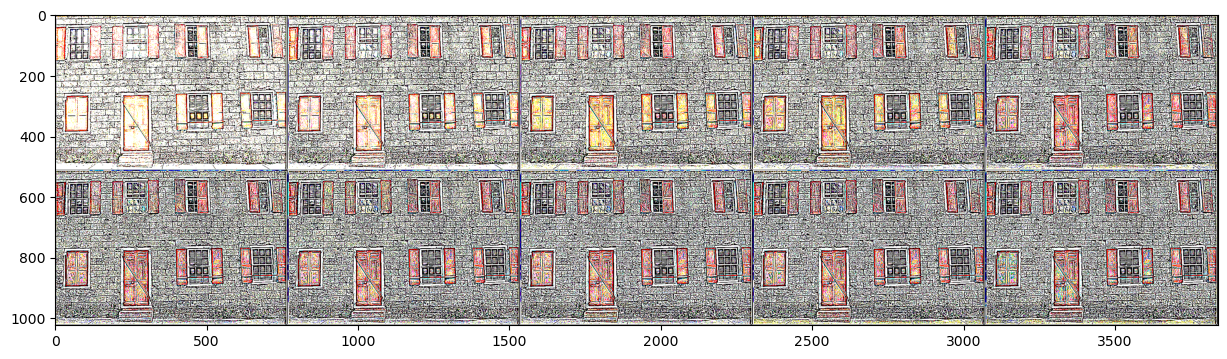

In [58]:
# Create the collage
out1 = np.hstack([sharpened1, sharpened2, sharpened3, sharpened4, sharpened5])
out2 = np.hstack([sharpened6,sharpened7, sharpened8, sharpened9, sharpened10])
out = np.vstack([out1, out2])

plt.imshow(out)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
На мой вгзляд самое лучшее значение єто 30.
При значении 30 мы видим все детали но при этом часть информации размывается и не будет мешать нам в обработке изображения, и так же при значении 30 у нас не большое количество артифактов на изображениях.

In [ ]:
 * What happens if it is too large?
На мой взгляд значение amount больше 50  ставить не имеет смысла.
Так как при увеличении занчения более 50 мы не видим практически никаких изменений


In [ ]:
* What happens if it is too small?
При указании значения 1 мы видим все детали, тоесть изображение практически имеет изходное состояние, и мы можем распознать все детали, что возможно может повлиять на обработку и вычленение информации